<h1>KAYAK Data Analysis </h1><br/>
Nancy N. Wei    |  nancywei@post.harvard.edu  |  <a href="https://www.linkedin.com/in/nancynwei" target="_blank">LinkedIn</a>
<br/>

<h1><a id="toc"></a>Table of Contents</h1>
<ol><br/>
<li><a href='#importlibraries'>Import Libraries</a></li><br/>
<li><a href='#importdata'>Import Data and Check Data Integrity</a></li><br/>
<li><a href='#analysis'>Analysis</a></li>

<br/>
<ol>
    <li><b>Seasonality Trends</b> - analysis of seasonal data only (excluding marketing channel information)</li>
    
    <ul>
    <li><b>Trends by Month</b></li>
        <ul>
        <li><a href='#II1a'>1a.</a> Which month has the highest and lowest number of visits? <a href='#I1a'>[ANSWER]</a></li>
        <li><a href='#II2a'>2a.</a> Which month has the highest and lowest conversions? <a href='#I2a'>[ANSWER]</a></li>
        </ul>
    <br/>
    <li><b>Trends by Country: Visits</b></li>
        <ul>
        <li><a href='#II3a'>3a.</a> Which country has the highest number of visits in entire given dataset?  Why? <a href='#I3a'>[ANSWER]</a></li>
        <li><a href='#II3b'>3b.</a> For each country, what is the total number of user visits for each month? <a href='#I3b'>[ANSWER]</a></li>
        <li><a href='#II3c'>3c.</a> For each year, which month has the most and least number of visits?  Show which country is associated with these numbers and provide explanation. <a href='#I3c'>[ANSWER]</a></li>
        <li><a href='#II3d'>3d.</a> For the United States, which month has the most and which month has the least number of visits? <a href='#I3d'>[ANSWER]</a></li>
        <li><a href='#II3e'>3e.</a> For Finland, which month has the most and which month has the least number of visits? <a href='#I3e'>[ANSWER]</a></li>
        <li><a href='#II3f'>3f.</a> For Norway, which month has the most and which month has the least number of visits? <a href='#I3f'>[ANSWER]</a></li>
        </ul><br/>
    <li><b>Trends by Country: Conversions</b></li>
        <ul>
        <li><a href='#II4a'>4a.</a> Which country has the highest number of conversions in entire given dataset?  Why? <a href='#I4a'>[ANSWER]</a></li>
        <li><a href='#II4b'>4b.</a> For each country, what is the total number of conversions for each month? <a href='#I4b'>[ANSWER]</a></li>
        <li><a href='#II4c'>4c.</a> For each year, which month has the most and least number of conversions?  Show which country is associated with these numbers and provide explanation. <a href='#I4c'>[ANSWER]</a></li>
        </ul><br/>
    </ul>

<br/>

<li><b>Marketing Channel Insight</b> - (including marketing channel information)</li>
    <ul>
    <li><a href='#II5a'>5a.</a> Which marketing channel has the highest number of user visits? <a href='#I5a'>[ANSWER]</a></li>
    <li><a href='#II5b'>5b.</a> Which marketing channel has the highest conversion rate? <a href='#I5b'>[ANSWER]</a>
      |  <a href='#Plot7a'>[Scatter Plot]</a></li>
    </ul>
</ol>

<br/>

<li><a href='#wrangling'>Data Wrangling</a></li>
    <ul>
    <li><a href='#II6a'>6a.</a> Handling of data issues <a href='#I6a'>[ANSWER]</a></li>
    </ul>

<br/>

<li><a href='#predictions'>Predictions</a></li>
    <ul>
    <li>
    <a href='#I7a'>7a.</a> Predict next month's aggregate conversion rates 
    <a href='#I7feature'>[Feature Matrix]</a> 
    <a href='#I7classifier'>[Linear Regression Classifier]</a> 
    <a href='#I7improvedclassifier'>[Improved Classifier]</a> 
    <a href='#I7'>[ANSWER]</a>
    </li>
    </ul>

<br/>
<li><a href="https://sso.online.tableau.com/public/idp/SSO">Tableau Visualizations</a> [password required]</li><br/>
</ol>

<a id='importlibraries'></a><h2>Import Libraries</h2><a href='#toc'>[Table of Contents]</a>

In [490]:
# import python libraries to use with data
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
import seaborn as sns

<a id='importdata'></a><h2>Import Data and Check Data Integrity</h2><a href='#toc'>[Table of Contents]</a>
<br/><br/>Data files have been uploaded to a secure server so that the code below can be run quickly without moving files to local directories.
<ul>
<li><a href='#visits'>visits</a></li>
<li><a href='#conversions'>conversions</a></li>
<li><a href='#marketingchannel'>marketingchannel</a></li></ul>

<br/><a id="visits"></a><h4>Visits</h4>
<br/><a href='#importdata'>[Import Data and Check Data Integrity]</a>  |  <a href='#toc'>[Table of Contents]</a>

In [491]:
# build pandas dataframe from csv file 

### visits.csv  (daily number of users by user country and marketing channel)
df_visits = pd.read_csv('http://chilp.it/45e17bd')  

# data integrity check:  check how many countries are in df_visits
print 'Country codes: ', df_visits['country_code'].unique()

# check for missing data: returns True if there are no missing value like '' or None
print 'No missing data in datestamp? ', all(x for x in df_visits['datestamp'])
print 'No missing data in country_code? ', all(x for x in df_visits['country_code'])
print 'No missing data in marketing_channel? ', all(x for x in df_visits['marketing_channel'])
print 'No missing data in user_visits? ', all(x for x in df_visits['user_visits']), '\n'

print 'DataFrame df_visits: ', df_visits.shape
df_visits.head(10)

Country codes:  ['be' 'fi' 'fr' 'gr' 'ie' 'no' 'pt' 'us']
No missing data in datestamp?  True
No missing data in country_code?  True
No missing data in marketing_channel?  True
No missing data in user_visits?  True 

DataFrame df_visits:  (9373, 4)


,datestamp,country_code,marketing_channel,user_visits
0,2014-11-01,be,Display Ads,1855
1,2014-11-01,be,KAYAK Deals Email,47
2,2014-11-01,be,Search Engine Ads,2203
3,2014-11-01,be,Search Engine Results,1402
4,2014-11-01,fi,Display Ads,10
5,2014-11-01,fi,Search Engine Results,5
6,2014-11-01,fr,Display Ads,578
7,2014-11-01,fr,KAYAK Deals Email,10
8,2014-11-01,fr,Search Engine Ads,1479
9,2014-11-01,fr,Search Engine Results,1407


<br/><a id="conversions"></a><h4>Conversions</h4>
<br/><a href='#importdata'>[Import Data and Check Data Integrity]</a>  |  <a href='#toc'>[Table of Contents]</a>

In [492]:
### conversions.csv  (conversions mean bookings per visit)
df_conv = pd.read_csv('http://chilp.it/cd69ae6')

# data integrity check:  check how many countries are in df_conv
print 'Country codes: ', df_conv['country_code'].unique()

# check data: returns True if there are no missing value like '' or None
# returns False if there is a value 0 or '' or None
print 'No missing data in datestamp? ', all(x for x in df_conv['datestamp'])
print 'No missing data in country_code? ', all(x for x in df_conv['country_code'])
print 'No missing data in marketing_channel? ', all(x for x in df_conv['marketing_channel'])
print 'No missing data in conversions? ', all(x for x in df_conv['conversions'])

# column 'conversions' returns False, so check which rows returned False
nullConvs = [i for i, item in enumerate(df_conv['conversions']) if item is None]
print 'Rows with null conversions: ', nullConvs, '\n'

# find the rows with 0 conversions and find their index values so that the rows can be counted later 
zeroConvs = [i for i, item in enumerate(df_conv['conversions']) if item == 0]
print 'Rows with 0 conversions: ', zeroConvs, '\n'

print 'DataFrame df_conv: ', df_conv.shape
df_conv.head(10)

Country codes:  ['be' 'fi' 'fr' 'gr' 'ie' 'no' 'pt' 'us']
No missing data in datestamp?  True
No missing data in country_code?  True
No missing data in marketing_channel?  True
No missing data in conversions?  False
Rows with null conversions:  [] 

Rows with 0 conversions:  [64, 417, 432, 477, 705, 992, 2796, 4733, 4762, 4792, 4820, 4848, 8454] 

DataFrame df_conv:  (9006, 4)


,datestamp,country_code,marketing_channel,conversions
0,2014-11-01,be,Display Ads,1174
1,2014-11-01,be,KAYAK Deals Email,57
2,2014-11-01,be,Search Engine Ads,1122
3,2014-11-01,be,Search Engine Results,976
4,2014-11-01,fi,Display Ads,12
5,2014-11-01,fi,Search Engine Results,2
6,2014-11-01,fr,Display Ads,370
7,2014-11-01,fr,KAYAK Deals Email,13
8,2014-11-01,fr,Search Engine Ads,538
9,2014-11-01,fr,Search Engine Results,890


In [493]:
# find the rows with 0 conversions and print those rows to look at the data
df_zeroConvs = pd.DataFrame(df_conv.iloc[zeroConvs])
df_zeroConvs

,datestamp,country_code,marketing_channel,conversions
64,2014-11-03,fi,Search Engine Results,0
417,2014-11-15,fi,Search Engine Results,0
432,2014-11-15,no,Search Engine Results,0
477,2014-11-17,fi,Search Engine Results,0
705,2014-11-25,fi,Search Engine Results,0
992,2014-12-05,fi,Search Engine Results,0
2796,2015-02-06,fi,Search Engine Results,0
4733,2015-04-13,us,Display Ads,0
4762,2015-04-14,us,Display Ads,0
4792,2015-04-15,us,Display Ads,0


In [494]:
# summarize which records in data set have 0 conversions
print 'number of records with 0 conversions: ', np.size(zeroConvs), '\n'
print 'number of records with 0 conversions by datestamp: ', '\n', df_zeroConvs.groupby('datestamp').size(), '\n'
print 'number of records with 0 conversions by country: ', '\n', df_zeroConvs.groupby('country_code').size(), '\n'
print 'number of records with 0 conversions by marketing_channel: ', '\n', df_zeroConvs.groupby('marketing_channel').size(), '\n'

number of records with 0 conversions:  13 

number of records with 0 conversions by datestamp:  
datestamp
2014-11-03    1
2014-11-15    2
2014-11-17    1
2014-11-25    1
2014-12-05    1
2015-02-06    1
2015-04-13    1
2015-04-14    1
2015-04-15    1
2015-04-16    1
2015-04-17    1
2015-08-14    1
dtype: int64 

number of records with 0 conversions by country:  
country_code
fi    6
no    2
us    5
dtype: int64 

number of records with 0 conversions by marketing_channel:  
marketing_channel
Display Ads              5
Search Engine Results    8
dtype: int64 



<a id="marketingchannel"></a><h4>Marketing Channel</h4>
<br/><a href='#importdata'>[Import Data and Check Data Integrity]</a>  |  <a href='#toc'>[Table of Contents]</a>

In [495]:
### channel_descriptions.csv (description of each marketing channel)
df_chdesc = pd.read_csv('http://chilp.it/ad0b6e4')

# data integrity check:  check how many marketing channels are in df_chdesc
print 'Marketing Channels: ', df_chdesc['marketing_channel'].unique(), '\n'

print 'DataFrame df_chdesc: ', df_chdesc.shape
df_chdesc

Marketing Channels:  ['Display Ads' 'KAYAK Deals Email' 'Search Engine Ads'
 'Search Engine Results' 'Travel Search Site'] 

DataFrame df_chdesc:  (5, 3)


,marketing_channel,example_user_acquisition_site,description
0,Display Ads,yahoo.com,Usually visual ads that appear on the right rail
1,KAYAK Deals Email,kayak.com,Email deals that users can book on our site
2,Search Engine Ads,google.com,SEM:Search ads that appear in the right rail o...
3,Search Engine Results,google.com,SEO:organic search results on google/bing/yahoo
4,Travel Search Site,bookingbuddy.com,Users on travel search sites can visit KAYAK d...


<br/><br/><a id='analysis'></a><h2>Analysis</h2><a href='#toc'>[Table of Contents]</a>

<h3>Seasonality Trends</h3>
<br/><br/>
<b>Question from Prompt:</b><br/>
Do you see any interesting patterns in the data?  For example, are there any seasonality trends in user visits?  <br/>
Do these seasonality trends differ between countries?  Can you think of any potential explanations for any of the pattern/trends/differences you saw?
<br/><br/>
<b>To answer these questions, I devised new questions (see the following below) which will help me better understand patterns and trends in the data given.</b>
<br/>

<h4><a id='II1a'></a>1a. Which month has the highest and lowest number of visits?</h4>
Skip to <a href='#I1a'>Answer</a>

In [496]:
# quick look at data
novVisits = df_visits[df_visits.datestamp == "2015-07-28"]
print 'number of visits on 2015-07-28: ', novVisits.user_visits.values.sum(), '\n'

# calculate total visits for each datestamp
df_totalVisits_day = df_visits.groupby(['datestamp'], as_index=False).sum()

# look at which specific days have the highest number of visits (sort in descending order)
df_totalVisits_day.sort('user_visits', ascending=[0]).head()

number of visits on 2015-07-28:  277595 



,datestamp,user_visits
269,2015-07-28,277595
268,2015-07-27,273396
262,2015-07-21,259502
261,2015-07-20,257660
255,2015-07-14,255929


In [497]:
### prepare dataframe so that it can be grouped by month or day or year separately
# convert data in column of pandas DataFrame to date-like object

df_totalVisits_day["date"]  = pd.to_datetime(df_totalVisits_day.datestamp)
df_totalVisits_day["day"] = map(lambda x: x.day, df_totalVisits_day.date)
df_totalVisits_day["month"] = map(lambda x: x.month, df_totalVisits_day.date)
df_totalVisits_day["year"] = map(lambda x: x.year, df_totalVisits_day.date)

print 'DataFrame df_totalVisits_day (sorted): ', df_totalVisits_day.shape
df_totalVisits_day.head()

DataFrame df_totalVisits_day (sorted):  (304, 6)


,datestamp,user_visits,date,day,month,year
0,2014-11-01,66484,2014-11-01,1,11,2014
1,2014-11-02,87027,2014-11-02,2,11,2014
2,2014-11-03,108879,2014-11-03,3,11,2014
3,2014-11-04,107219,2014-11-04,4,11,2014
4,2014-11-05,105700,2014-11-05,5,11,2014


In [498]:
# create a new DataFrame to contain new columns date, month, year
df_visits_master = df_totalVisits_day                                                

# data integrity check:  check how many years of data exist in df_visits_master
years_unique = df_visits_master['year'].unique()
years_unique

array([2014, 2015], dtype=int64)

In [499]:
# calculate total number of visitors by month
totalVisits_month = pd.DataFrame(df_visits_master.groupby(['year', 'month'], as_index=False).sum())
totalVisits_month.drop('day', axis=1, inplace=True)
print 'DataFrame totalVisits_month: ', totalVisits_month.shape
totalVisits_month

DataFrame totalVisits_month:  (10, 3)


,year,month,user_visits
0,2014,11,2594282
1,2014,12,2655022
2,2015,1,3418542
3,2015,2,4471811
4,2015,3,4654588
5,2015,4,3759266
6,2015,5,4629416
7,2015,6,5395501
8,2015,7,6638051
9,2015,8,5794003


<a href='#conversionsbymonth'>Compare to conversions by month</a>

In [500]:
# find the months with highest and lowest number of visitors
totalVisits_month['max_val'] = totalVisits_month.groupby('year')['user_visits'].transform(np.max)
totalVisits_month['min_val'] = totalVisits_month.groupby('year')['user_visits'].transform(np.min)
maxVisits_month = pd.DataFrame(totalVisits_month.query('max_val == user_visits'))
minVisits_month = pd.DataFrame(totalVisits_month.query('min_val == user_visits'))

# create new pandas DataFrame containing *only* highest and lowest number of visits for each year
max_min_Visits_month = pd.concat([maxVisits_month, minVisits_month], ignore_index=True).sort('year')

for y in enumerate(years_unique):
    selectYear = y    
    max_selectYear = max_min_Visits_month[(max_min_Visits_month.year == selectYear[1]) & (max_min_Visits_month.max_val == max_min_Visits_month.user_visits)].month.tolist()
    print 'year:', selectYear[1], '\n Month with highest number of visitors:', max_selectYear
    min_selectYear = max_min_Visits_month[(max_min_Visits_month.year == selectYear[1]) & (max_min_Visits_month.min_val == max_min_Visits_month.user_visits)].month.tolist()
    print ' Month with lowest number of visitors:', min_selectYear
    
# drop unnecessary columns 
max_min_Visits_month.drop(['max_val', 'min_val'], axis=1, inplace=True)

print '\n DataFrame max_min_Visits_month', max_min_Visits_month.shape
max_min_Visits_month = max_min_Visits_month.reset_index(drop=True)
max_min_Visits_month.head()

year: 2014 
 Month with highest number of visitors: [12]
 Month with lowest number of visitors: [11]
year: 2015 
 Month with highest number of visitors: [7]
 Month with lowest number of visitors: [1]

 DataFrame max_min_Visits_month (4, 3)


,year,month,user_visits
0,2014,12,2655022
1,2014,11,2594282
2,2015,7,6638051
3,2015,1,3418542


<br/><b><a id="I1a"></a>1a. ANSWER</b>
<br/><br/>
From the results extracted from the data, I notice that in 2014, there were only two months of data given (November and December). It turns out that December has the highest number of total visits compared to November.  Most countries have national holidays at the end of the year.  
<br/>As the end of the year approaches, people are more likely to be making their holiday plans and search for flights and accommodations.  I would assume (and this should be backed with more empirical data) that people are more likely to travel for their holidays in December as opposed to other months.  Travellers might have saved up their vacations days from work to the end of the year.  Children in schools also have the longest holiday break at the end of the year.
<br/><br/>
From year 2015, July has the highest number of visitors and January the lowest number of visitors.
This can be explained by the fact that most countries in western Europe have long holidays in the month of July and especially in August.  In fact, most Europeans have the entire month of August off from work.  Given this knowledge, it is possible that people are more likely to make travel plans in July for their month off in August and stay home or travel locally in December.  
<br/>
It also turns out without surprise that the month with the lowest number of visitors in 2015 is January.
<br/>In January, travellers are less likely to make travel plans because they have just finished the holidays in the previous month.
<br/><br/>
Therefore, the monthly visits data reflects the seasonality trend of travel.  I will investigate later in this report the patterns in seasonality between countries.  <br/>I definitely think there will be some noticeble seasonality trends when I dig deeper.<br/><br/>
<p align="right"><a href='#toc'>[Table of Contents]</a></p>

<h4><a id="II2a"></a>2a. Which month has the highest and lowest conversion rates?</h4>
Skip to <a href='#I2a'>Answer</a>

In [501]:
# show total conversions by datestamp
df_totalConvs_day = df_conv.groupby(['datestamp'], as_index=False).sum()

print '\n DataFrame df_totalConvs_day', df_totalConvs_day.shape
df_totalConvs_day.head()


 DataFrame df_totalConvs_day (304, 2)


,datestamp,conversions
0,2014-11-01,27790
1,2014-11-02,37436
2,2014-11-03,43017
3,2014-11-04,43170
4,2014-11-05,41859


In [502]:
# show which specific days have the highest conversions (sort in descending order)
print '\n DataFrame df_totalConvs_day, sorted in descending order', df_totalConvs_day.shape
df_totalConvs_day.sort('conversions', ascending=[0]).head(10)


 DataFrame df_totalConvs_day, sorted in descending order (304, 2)


,datestamp,conversions
102,2015-02-11,604745
262,2015-07-21,88045
268,2015-07-27,87497
255,2015-07-14,86621
256,2015-07-15,85630
261,2015-07-20,85585
269,2015-07-28,85478
263,2015-07-22,85059
270,2015-07-29,82403
276,2015-08-04,81664


In [503]:
### prepare dataframe so that it can be grouped by month or day or year separately
# convert data in column of pandas DataFrame to date-like object
df_totalConvs_day["date"]  = pd.to_datetime(df_totalConvs_day.datestamp)
df_totalConvs_day["day"] = map(lambda x: x.day, df_totalConvs_day.date)
df_totalConvs_day["month"] = map(lambda x: x.month, df_totalConvs_day.date)
df_totalConvs_day["year"] = map(lambda x: x.year, df_totalConvs_day.date)

print 'DataFrame df_totalConvs_day ', df_totalConvs_day.shape
df_totalConvs_day.head()

DataFrame df_totalConvs_day  (304, 6)


,datestamp,conversions,date,day,month,year
0,2014-11-01,27790,2014-11-01,1,11,2014
1,2014-11-02,37436,2014-11-02,2,11,2014
2,2014-11-03,43017,2014-11-03,3,11,2014
3,2014-11-04,43170,2014-11-04,4,11,2014
4,2014-11-05,41859,2014-11-05,5,11,2014


In [504]:
# create a new DataFrame to contain new columns date, month, year
df_convs_master = df_totalConvs_day                                                

# data integrity check:  check how many years exist in df_convs_master
years_unique = df_convs_master['year'].unique()
years_unique

array([2014, 2015], dtype=int64)

In [505]:
# calculate total number of conversions by month
totalConvs_month = pd.DataFrame(df_convs_master.groupby(['year', 'month'], as_index=False).sum())
totalConvs_month.drop('day', axis=1, inplace=True)

print 'Total number of conversions by month: ', '\n', 'DataFrame totalConvs_month', totalConvs_month.shape
totalConvs_month

Total number of conversions by month:  
DataFrame totalConvs_month (10, 3)


,year,month,conversions
0,2014,11,1032103
1,2014,12,973603
2,2015,1,1275258
3,2015,2,2088986
4,2015,3,1665522
5,2015,4,1285097
6,2015,5,1608755
7,2015,6,1666392
8,2015,7,2224684
9,2015,8,1895587


<a href='#visitsbymonth'>Compare to visits by month</a>

In [506]:
# find the months with highest and lowest number of conversions
totalConvs_month['max_val'] = totalConvs_month.groupby('year')['conversions'].transform(np.max)
totalConvs_month['min_val'] = totalConvs_month.groupby('year')['conversions'].transform(np.min) 

maxConvs_month = pd.DataFrame(totalConvs_month.query('max_val == conversions'))
minConvs_month = pd.DataFrame(totalConvs_month.query('min_val == conversions'))

max_min_Convs_month = pd.concat([maxConvs_month, minConvs_month], ignore_index=True).sort('year')

# print out answer
for y in enumerate(years_unique):
    selectYear = y
    max_selectYear = max_min_Convs_month[(max_min_Convs_month.year == selectYear[1]) & (max_min_Convs_month.max_val == max_min_Convs_month.conversions)].month.tolist()
    print 'year:', selectYear[1], '\n Month with highest number of conversions:', max_selectYear
    min_selectYear = max_min_Convs_month[(max_min_Convs_month.year == selectYear[1]) & (max_min_Convs_month.min_val == max_min_Convs_month.conversions)].month.tolist()
    print ' Month with lowest number of conversions:', min_selectYear
    
# drop unnecessary columns and reset index row numbers
max_min_Convs_month.drop(['max_val', 'min_val'], axis=1, inplace=True)
max_min_Convs_month = max_min_Convs_month.reset_index(drop=True)

print '\n DataFrame max_min_Visits_month', max_min_Visits_month.shape
max_min_Convs_month.head()

year: 2014 
 Month with highest number of conversions: [11]
 Month with lowest number of conversions: [12]
year: 2015 
 Month with highest number of conversions: [7]
 Month with lowest number of conversions: [1]

 DataFrame max_min_Visits_month (4, 3)


,year,month,conversions
0,2014,11,1032103
1,2014,12,973603
2,2015,7,2224684
3,2015,1,1275258


<br/><b><a id="I2a"></a>2a. ANSWER</b><br/><br/>
The data given for year 2014 contains information for only November and December, so the months with the "highest/lowest number of conversions" may not necessarily be correct.  But this data is still useful for predicting future conversion rates.  
In year 2015, we also have incomplete data as the information is up to September 2015.<br/><br/>
<b>November 2014</b> has higher conversion than <b>December 2014</b> because travellers probably would like to book for December vacations about a month in advance. 
<br/><br/>
We see from the total conversion rate calculations that the month with the highest conversions is <b>July 2015</b> and the month with lowest conversion is <b>January 2015</b>.  This is consistent with the results of the number of visits in the previous question.  A possible explanation for this pattern is that travellers are likely to book for their summer vacation in July and August and for their Christmas/New Year holidays in November.  

The month with the lowest number of conversions is January 2015 and this could be because travellers have already returned from their December holidays and are less likely to book travel for the next month.
<br/>
<p align="right"><a href='#toc'>[Table of Contents]</a></p>

<a id='II3a'></a><h4>3a.  Which country has the highest number of visits in entire given dataset?  Why?</h4>
Skip to <a href='#I3a'>Answer</a>  <a href='#II4a'>Compare to country with highest conversions</a>

In [507]:
### 3a.

# show which country has highest number of visits in entire dataset
df_totalVisits_byCountry = df_visits.groupby(['country_code'], as_index=False).sum()

print 'DataFrame df_totalVisits_byCountry', df_totalVisits_byCountry.shape
df_totalVisits_byCountry.sort('user_visits', ascending=[0])

DataFrame df_totalVisits_byCountry (8, 2)


,country_code,user_visits
7,us,31501712
6,pt,4628647
0,be,2713130
2,fr,2447418
3,gr,1422514
4,ie,1262374
1,fi,18121
5,no,16566


<br/><b><a id="I3a"></a>3a. ANSWER</b><br/>
<p align="right"><a href='#toc'>[Table of Contents]</a></p><br/><br/>

<a id='II3b'></a><h4>3b. For each country, what is the total number of user visits for each month?</h4>
Skip to <a href='#I3b'>Answer</a> <a href='#II4b'>Compare to conversions each month for each country</a>

In [730]:
### 3b.

### Step 1 - Data wrangling: convert data in column of pandas DataFrame to date-like object
# This allows easier querying and sorting by month/day/year
df_visitsbyCountry = df_visits
df_visitsbyCountry["date"]  = pd.to_datetime(df_visitsbyCountry.datestamp)
df_visitsbyCountry["day"] = map(lambda x: x.day, df_visitsbyCountry.date)
df_visitsbyCountry["month"] = map(lambda x: x.month, df_visitsbyCountry.date)
df_visitsbyCountry["year"] = map(lambda x: x.year, df_visitsbyCountry.date)

print 'DataFrame df_visitsbyCountry', df_visitsbyCountry.shape
df_visitsbyCountry.head(20)

DataFrame df_visitsbyCountry (9373, 8)


,datestamp,country_code,marketing_channel,user_visits,date,day,month,year
0,2014-11-01,be,Display Ads,1855,2014-11-01,1,11,2014
1,2014-11-01,be,KAYAK Deals Email,47,2014-11-01,1,11,2014
2,2014-11-01,be,Search Engine Ads,2203,2014-11-01,1,11,2014
3,2014-11-01,be,Search Engine Results,1402,2014-11-01,1,11,2014
4,2014-11-01,fi,Display Ads,10,2014-11-01,1,11,2014
5,2014-11-01,fi,Search Engine Results,5,2014-11-01,1,11,2014
6,2014-11-01,fr,Display Ads,578,2014-11-01,1,11,2014
7,2014-11-01,fr,KAYAK Deals Email,10,2014-11-01,1,11,2014
8,2014-11-01,fr,Search Engine Ads,1479,2014-11-01,1,11,2014
9,2014-11-01,fr,Search Engine Results,1407,2014-11-01,1,11,2014


In [509]:
### 3b.

### Here, we are only concerned with the country code, year, month, and visits. 

# Step 2 - calculate total number of visitors per month for each country
totalVisits_month_byCountry = pd.DataFrame(df_visitsbyCountry.groupby(['country_code', 'year', 'month'], as_index=False).sum())
totalVisits_month_byCountry.drop('day', axis=1, inplace=True)

print 'DataFrame totalVisits_month_byCountry (sorted by country): ', totalVisits_month_byCountry.shape
totalVisits_month_byCountry.head()

DataFrame totalVisits_month_byCountry (sorted by country):  (80, 4)


,country_code,year,month,user_visits
0,be,2014,11,200158
1,be,2014,12,168305
2,be,2015,1,222174
3,be,2015,2,225771
4,be,2015,3,248425


<br/><b><a id="I3b"></a>3b. ANSWER</b><br/>
<p align="right"><a href='#toc'>[Table of Contents]</a></p><br/><br/>

<a id='II3c'></a><h4>3c. For each year, which month has the most and least number of visits?</h4>Show which country is associated with these numbers and provide explanation.
<br/>Skip to <a href='#I3c'>Answer</a>  <a href='#II4c'>Compare with months with most and least conversions</a>

In [510]:
### 3c.

# for each year, find the months with highest and lowest number of visitors and include country code
totalVisits_month_byCountry['max_val'] = totalVisits_month_byCountry.groupby('year')['user_visits'].transform(np.max)
totalVisits_month_byCountry['min_val'] = totalVisits_month_byCountry.groupby('year')['user_visits'].transform(np.min)    

maxVisits_month_byCountry = pd.DataFrame(totalVisits_month_byCountry.query('max_val == user_visits'))
minVisits_month_byCountry = pd.DataFrame(totalVisits_month_byCountry.query('min_val == user_visits'))

# create new pandas DataFrame containing *only* highest and lowest number of visits for each year
max_min_Visits_month_byCountry = pd.concat([maxVisits_month_byCountry, minVisits_month_byCountry], ignore_index=True).sort('year')

# rearrange order of columns so year and month shows in left columns
cols = max_min_Visits_month_byCountry.columns.tolist()
cols = ['year', 'month', 'country_code', 'user_visits', 'max_val', 'min_val']
max_min_Visits_month_byCountry = max_min_Visits_month_byCountry[cols]

# print out answer 
for y in enumerate(years_unique):
    selectYear = y
    max_selectYear = max_min_Visits_month_byCountry[(max_min_Visits_month_byCountry.year == selectYear[1]) & (max_min_Visits_month_byCountry.max_val == max_min_Visits_month_byCountry.user_visits)].month.tolist()
    print 'year:', selectYear[1], '\n Month with highest number of visits by country:', max_selectYear
    min_selectYear = max_min_Visits_month_byCountry[(max_min_Visits_month_byCountry.year == selectYear[1]) & (max_min_Visits_month_byCountry.min_val == max_min_Visits_month_byCountry.user_visits)].month.tolist()
    print ' Month with lowest number of visits by country:', min_selectYear

# drop unnecessary columns and reset row index numbers
max_min_Visits_month_byCountry.drop(['max_val', 'min_val'], axis=1, inplace=True)
max_min_Visits_month_byCountry = max_min_Visits_month_byCountry.reset_index(drop=True)

print '\n DataFrame max_min_Visits_month_byCountry', max_min_Visits_month_byCountry.shape
max_min_Visits_month_byCountry

year: 2014 
 Month with highest number of visits by country: [12]
 Month with lowest number of visits by country: [12]
year: 2015 
 Month with highest number of visits by country: [7]
 Month with lowest number of visits by country: [1]

 DataFrame max_min_Visits_month_byCountry (4, 4)


,year,month,country_code,user_visits
0,2014,12,us,2054353
1,2014,12,fi,950
2,2015,7,us,4297035
3,2015,1,no,1469


<br/><b><a id="I3c"></a>3c. ANSWER</b><br/>
<br/>Countries have different seasons based on geographical location.  People from countries experiencing cold weather might like to visit countries with warmer weather.  This may cause visitors from some countries to visit travel booking sites more often during certain seasons.
<br/><br/>
From the data, I see that the United States has both the highest number of visits in December 2014 and July 2015.  Finland and Norway, both Scandinavian countries, have the lowest number of visits in December 2014 and January 2015, respectively.  
<br/>It is important to note that <a href="#I3e">Finland</a> and <a href="#I3f">Norway's</a> visit numbers are lower than the United States, but that doesn't give us seasonal trend information for these countries per se.  We cannot compare data between the US and Finland because there is a huge difference in population.
<br/><br/>
I noticed that the number of user visits in July 2015 is higher than visits in December 2014 for the United States.  
<br/>
Therefore, even though I don't have data for the US from July 2014 nor December 2015, I presume that user visits for July 2014 was higher than December 2014.  I also expect the user visits for December 2015 to be lower than July 2015.  This is yet to be seen in the <b>prediction model (Section IV)</b>.
<br/><br/><a href='#toc'>[Table of Contents]</a><br/><br/>

<a id='II3d'></a><h4>3d. For the United States, which month has the most and which month has the least number of visits?</h4>Skip to <a href='#I3d'>Answer</a>

In [511]:
### 3d.

# create new DataFrame containing only total visits for each month for US
totalVisits_month_US = pd.DataFrame(totalVisits_month_byCountry.query(totalVisits_month_byCountry.country_code == 'us'))

# find highest and lowest number of visits for each month in each year 
totalVisits_month_US['max_val'] = totalVisits_month_US.groupby('year')['user_visits'].transform(np.max)
totalVisits_month_US['min_val'] = totalVisits_month_US.groupby('year')['user_visits'].transform(np.min)    

# create new DataFrame containing *only* highest and lowest number of visits for each year
maxVisits_month_US = pd.DataFrame(totalVisits_month_US.query('max_val == user_visits'))
minVisits_month_US = pd.DataFrame(totalVisits_month_US.query('min_val == user_visits'))

max_min_Visits_month_US = pd.concat([maxVisits_month_US, minVisits_month_US], ignore_index=True).sort('year')

# drop unnecessary columns and reset row index numbers
max_min_Visits_month_US.drop(['max_val', 'min_val'], axis=1, inplace=True)
max_min_Visits_month_US = max_min_Visits_month_US.reset_index(drop=True)

print '\n DataFrame max_min_Visits_month_US', max_min_Visits_month_US.shape
max_min_Visits_month_US


 DataFrame max_min_Visits_month_US (4, 4)


,country_code,year,month,user_visits
0,us,2014,12,2054353
1,us,2014,11,1893918
2,us,2015,7,4297035
3,us,2015,1,2662763


<a id='I3d'></a><b>3d. ANSWER</b><br/>
For the US in 2014, December has the highest number of visits and November has lowest number of visits.  However, only November and December data is given for 2014.  For the US in 2015, July has the highest number of visits and January has the lowest number of visits.  However, only data from January to August was given. 
<br/><a href='#toc'>[Table of Contents]</a><br/><br/>

<a id='II3e'></a><h4>3e. For Finland, which month has the most and which month has the least number of visits?</h4>Skip to <a href='#I3e'>Answer</a>

In [512]:
### 3e.

# create new DataFrame containing only total visits for each month for Finland
totalVisits_month_FI = pd.DataFrame(totalVisits_month_byCountry.query(totalVisits_month_byCountry.country_code == 'fi'))

# find highest and lowest number of visits for each month in each year
totalVisits_month_FI['max_val'] = totalVisits_month_FI.groupby('year')['user_visits'].transform(np.max)
totalVisits_month_FI['min_val'] = totalVisits_month_FI.groupby('year')['user_visits'].transform(np.min)    

# create new DataFrame containing *only* highest and lowest number of visits for each year
maxVisits_month_FI = pd.DataFrame(totalVisits_month_FI.query('max_val == user_visits'))
minVisits_month_FI = pd.DataFrame(totalVisits_month_FI.query('min_val == user_visits'))

max_min_Visits_month_FI = pd.concat([maxVisits_month_FI, minVisits_month_FI], ignore_index=True).sort('year')

# drop unnecessary columns and reset row index numbers
max_min_Visits_month_FI.drop(['max_val', 'min_val'], axis=1, inplace=True)
max_min_Visits_month_FI = max_min_Visits_month_FI.reset_index(drop=True)

print '\n DataFrame max_min_Visits_month_FI', max_min_Visits_month_FI.shape
max_min_Visits_month_FI


 DataFrame max_min_Visits_month_FI (4, 4)


,country_code,year,month,user_visits
0,fi,2014,11,1095
1,fi,2014,12,950
2,fi,2015,5,2479
3,fi,2015,1,1549


<a id='I3e'></a><b>3e. ANSWER</b><br/>
In <a href='#I3c'>part 3c</a>, Finland had the lowest number of visits in December compared to all other countries in the dataset.  However, we only had data from November and December for year 2014, so we have insufficient data to do a reasonable comparison of data between months.  We also cannot compare Finland's data with that of the US because of a significant difference in popultion.  
<br/>
When we look only at Finland's data in year 2015, we see that May has the highest number of visits. This is not consistent with the seasonality trend from 3c when we saw that July 2015 (US) had the highest number of visits and January 2015 (NO) had the lowest number of visits. Therefore, from the data we can see a difference in seasonality trends between countries.
<a href='#toc'>[Table of Contents]</a><br/><br/>

<a id='II3f'></a><h4>3f. For Norway, which month has the most and which month has the least number of visits?</h4>Skip to <a href='#I3f'>Answer</a>

In [513]:
### 3f.

# create new DataFrame containing only total visits for each month for Finland
totalVisits_month_NO = pd.DataFrame(totalVisits_month_byCountry.query(totalVisits_month_byCountry.country_code == 'no'))

# find highest and lowest number of visits for each month in each year 
totalVisits_month_NO['max_val'] = totalVisits_month_NO.groupby('year')['user_visits'].transform(np.max)
totalVisits_month_NO['min_val'] = totalVisits_month_NO.groupby('year')['user_visits'].transform(np.min)    

# create new DataFrame containing *only* highest and lowest number of visits for each year
maxVisits_month_NO = pd.DataFrame(totalVisits_month_NO.query('max_val == user_visits'))
minVisits_month_NO = pd.DataFrame(totalVisits_month_NO.query('min_val == user_visits'))

max_min_Visits_month_NO = pd.concat([maxVisits_month_NO, minVisits_month_NO], ignore_index=True).sort('year')

# drop unnecessary columns and reset row index numbers
max_min_Visits_month_NO.drop(['max_val', 'min_val'], axis=1, inplace=True)
max_min_Visits_month_NO = max_min_Visits_month_NO.reset_index(drop=True)

print '\n DataFrame max_min_Visits_month_NO', max_min_Visits_month_NO.shape
max_min_Visits_month_NO


 DataFrame max_min_Visits_month_NO (4, 4)


,country_code,year,month,user_visits
0,no,2014,11,1309
1,no,2014,12,1117
2,no,2015,7,2103
3,no,2015,1,1469


<a id='I3f'></a><b>3f. ANSWER</b><br/>
In <a href='#I3c'>part 3c</a>, Norway had the lowest number of visits in January compared to all other countries in the dataset.  
However, when we look only at Norway's data, we see that July has the highest number of visits in 2015.
This is consistent with the seasonality trend from 3c when we saw that July had the highest number of visits and January had the lowest number of visits.
<a href='#toc'>[Table of Contents]</a><br/><br/>

<a id='II4a'></a><h4>4a. Which country has the highest number of conversions in entire given dataset? Why?</h4>Skip to <a href='#I4a'>Answer</a>
<a href='#II3a'>Compare to country with highest number of visits</a>

In [514]:
### 4a.

# show which country has highest conversion
df_totalConvs_byCountry = df_conv.groupby(['country_code'], as_index=False).sum()

print 'DataFrame df_totalConvs_byCountry', df_totalConvs_byCountry.shape
df_totalConvs_byCountry.sort('conversions', ascending=[0])

DataFrame df_totalConvs_byCountry (8, 2)


,country_code,conversions
7,us,10577832
6,pt,1590740
2,fr,1374646
0,be,1240923
3,gr,473145
4,ie,442983
1,fi,7878
5,no,7840


<a id='I4a'></a><b>4a. ANSWER</b><br/>  
<a href='#toc'>[Table of Contents]</a><br/><br/>

<a id='II4b'></a><h4>4b. For each country, what is the total number of conversions for each month?</h4>Skip to <a href='#I4b'>Answer</a>
<a href='#II3b'>Compare to visits each month for each country</a>

In [515]:
### 4b.

### Step 1 - Data wrangling: convert data in column of pandas DataFrame to date-like object
# This allows easier querying and sorting by month/day/year
df_convsbyCountry = df_conv
df_convsbyCountry["date"]  = pd.to_datetime(df_convsbyCountry.datestamp)
df_convsbyCountry["day"] = map(lambda x: x.day, df_convsbyCountry.date)
df_convsbyCountry["month"] = map(lambda x: x.month, df_convsbyCountry.date)
df_convsbyCountry["year"] = map(lambda x: x.year, df_convsbyCountry.date)

print 'DataFrame df_convsbyCountry', df_convsbyCountry.shape
df_convsbyCountry.head()

DataFrame df_convsbyCountry (9006, 8)


,datestamp,country_code,marketing_channel,conversions,date,day,month,year
0,2014-11-01,be,Display Ads,1174,2014-11-01,1,11,2014
1,2014-11-01,be,KAYAK Deals Email,57,2014-11-01,1,11,2014
2,2014-11-01,be,Search Engine Ads,1122,2014-11-01,1,11,2014
3,2014-11-01,be,Search Engine Results,976,2014-11-01,1,11,2014
4,2014-11-01,fi,Display Ads,12,2014-11-01,1,11,2014


In [516]:
### 4b.

### Here, we are only concerned with the country code, year, month, and visits. 

# Step 2 - calculate total conversions per month for each country
totalConvs_month_byCountry = pd.DataFrame(df_convsbyCountry.groupby(['country_code', 'year', 'month'], as_index=False).sum())
totalConvs_month_byCountry.drop('day', axis=1, inplace=True)

print 'DataFrame totalConvs_month_byCountry (sorted by country): ', totalConvs_month_byCountry.shape
totalConvs_month_byCountry.head()

DataFrame totalConvs_month_byCountry (sorted by country):  (80, 4)


,country_code,year,month,conversions
0,be,2014,11,111520
1,be,2014,12,91705
2,be,2015,1,127653
3,be,2015,2,122727
4,be,2015,3,130393


<a id='I4b'></a><b>4b. ANSWER</b><br/>  
<a href='#toc'>[Table of Contents]</a><br/><br/>

<a id='II4c'></a><h4>4c. For each year, which month has the most and least conversions?</h4><br/>
Show which country is associated with these numbers and provide explanation.Skip to <a href='#I4c'>Answer</a>
 <a href='#II3c'>Compare with months with most and least visits</a>

In [517]:
### 4c.

# for each year, find the months with highest and lowest conversions and include country code
totalConvs_month_byCountry['max_val'] = totalConvs_month_byCountry.groupby('year')['conversions'].transform(np.max)
totalConvs_month_byCountry['min_val'] = totalConvs_month_byCountry.groupby('year')['conversions'].transform(np.min)    

maxConvs_month_byCountry = pd.DataFrame(totalConvs_month_byCountry.query('max_val == conversions'))
minConvs_month_byCountry = pd.DataFrame(totalConvs_month_byCountry.query('min_val == conversions'))

# create new pandas DataFrame containing *only* highest and lowest conversions for each year for each country
max_min_Convs_month_byCountry = pd.concat([maxConvs_month_byCountry, minConvs_month_byCountry], ignore_index=True).sort('year')

# rearrange order of columns so year and month shows in left columns
cols = max_min_Convs_month_byCountry.columns.tolist()
cols = ['year', 'month', 'country_code', 'conversions', 'max_val', 'min_val']
max_min_Convs_month_byCountry = max_min_Convs_month_byCountry[cols]

# drop unnecessary columns and reset row index numbers
max_min_Convs_month_byCountry.drop(['max_val', 'min_val'], axis=1, inplace=True)
max_min_Convs_month_byCountry = max_min_Convs_month_byCountry.reset_index(drop=True)

print '\n DataFrame max_min_Convs_month_byCountry', max_min_Convs_month_byCountry.shape
max_min_Convs_month_byCountry


 DataFrame max_min_Convs_month_byCountry (4, 4)


,year,month,country_code,conversions
0,2014,12,us,707547
1,2014,11,fi,483
2,2015,7,us,1495487
3,2015,8,no,656


<a id='I4c'></a><b>4c. ANSWER</b><br/>  
<a href='#toc'>[Table of Contents]</a><br/><br/>

<br/><br/><h3>Marketing Channel Insight</h3><a href='#toc'>[Table of Contents]</a><br/><br/>

<a id='II5a'></a><h4>5a. Which marketing channel has the highest number of user visits?</h4>Skip to <a href='#I5a'>Answer</a>

In [750]:
### 5a.

# Step 1: start with the dataframe created earlier in 3b.

print 'DataFrame df_visitsbyCountry: ', df_visitsbyCountry.shape
df_visitsbyCountry.head()

DataFrame df_visitsbyCountry:  (9373, 8)


,datestamp,country_code,marketing_channel,user_visits,date,day,month,year
0,2014-11-01,be,Display Ads,1855,2014-11-01,1,11,2014
1,2014-11-01,be,KAYAK Deals Email,47,2014-11-01,1,11,2014
2,2014-11-01,be,Search Engine Ads,2203,2014-11-01,1,11,2014
3,2014-11-01,be,Search Engine Results,1402,2014-11-01,1,11,2014
4,2014-11-01,fi,Display Ads,10,2014-11-01,1,11,2014


In [751]:
### 5a.

# Step 2: create a new DataFrame to show monthly visits by marketing channel and country_code

totalVisits_month_byMC = pd.DataFrame(df_visitsbyCountry.groupby(['marketing_channel', 'country_code', 'year', 'month', 'day'], as_index=False).sum())
print 'DataFrame totalVisits_month_byMC: ', totalVisits_month_byMC.shape
totalVisits_month_byMC.head()

DataFrame totalVisits_month_byMC:  (9373, 6)


,marketing_channel,country_code,year,month,day,user_visits
0,Display Ads,be,2014,11,1,1855
1,Display Ads,be,2014,11,2,2507
2,Display Ads,be,2014,11,3,2594
3,Display Ads,be,2014,11,4,2492
4,Display Ads,be,2014,11,5,2227


In [754]:
### 5a.

# Step 3: calculate total visits per month for each marketing channel and country_code

totalVisits_byMC = pd.DataFrame(totalVisits_month_byMC.groupby(['marketing_channel', 'country_code', 'year', 'month'], as_index=False).sum())

# rearrange order of columns 
cols = totalVisits_byMC.columns.tolist()
cols = ['marketing_channel', 'country_code', 'year', 'month', 'user_visits']
totalVisits_byMC = totalVisits_byMC[cols]

marketing_channels = totalVisits_byMC['marketing_channel'].unique()
print 'marketing_channels: ', marketing_channels, '\n'

print 'DataFrame totalVisits_byMC', totalVisits_byMC.shape
totalVisits_byMC.head()

marketing_channels:  ['Display Ads' 'KAYAK Deals Email' 'Search Engine Ads'
 'Search Engine Results' 'Travel Search Site'] 

DataFrame totalVisits_byMC (357, 5)


,marketing_channel,country_code,year,month,user_visits
0,Display Ads,be,2014,11,62216
1,Display Ads,be,2014,12,52927
2,Display Ads,be,2015,1,70034
3,Display Ads,be,2015,2,66072
4,Display Ads,be,2015,3,75223


In [716]:
### 5a.

# rearrange data so that user_visits show under each marketing_channel
totalVisits_DA = totalVisits_byMC[totalVisits_byMC['marketing_channel'] == 'Display Ads'].copy()

# note: above code can work by using the query function:
# totalVisits_DA = totalVisits_byMC.query('marketing_channel == "Display Ads"')

totalVisits_DA.rename(columns={'user_visits':'Display Ads'}, inplace=True)
totalVisits_DA.drop(['marketing_channel'], axis=1, inplace=True)
totalVisits_DA = totalVisits_DA.reset_index(drop=True)
print '\n DataFrame totalVisits_DA', totalVisits_DA.shape
totalVisits_DA.head()


 DataFrame totalVisits_DA (80, 4)


,country_code,year,month,Display Ads
0,be,2014,11,62216
1,be,2014,12,52927
2,be,2015,1,70034
3,be,2015,2,66072
4,be,2015,3,75223


In [755]:
### 5a.

# Step 4: rearrange data so that user_visits show under each marketing_channel

def totalVisits(mc):
    totalVisits_mc = totalVisits_byMC[totalVisits_byMC['marketing_channel'] == mc].copy()

    # note: above code can work by using the query function:
    # totalVisits_mc = totalVisits_byMC.query('marketing_channel == "Display Ads"')

    totalVisits_mc.rename(columns={'user_visits': mc}, inplace=True)
    totalVisits_mc.drop(['marketing_channel'], axis=1, inplace=True)
    totalVisits_mc = totalVisits_mc.reset_index(drop=True)
    print '\n Monthly visits for marketing channel', '*', mc, '* \n Rows, Cols:', totalVisits_mc.shape, '\n'
    print totalVisits_mc.head(), '\n'
    return totalVisits_mc

# create a dictionary to save each DataFrame returned by function using marketing_channel as key
d={}
for index, item in enumerate(marketing_channels):
    d["{}".format(item)] = totalVisits(item)

print '*** NOTE: each country has different data for each marketing channel -- rows do not match. ***'


 Monthly visits for marketing channel * Display Ads * 
 Rows, Cols: (80, 4) 

  country_code  year  month  Display Ads
0           be  2014     11        62216
1           be  2014     12        52927
2           be  2015      1        70034
3           be  2015      2        66072
4           be  2015      3        75223 


 Monthly visits for marketing channel * KAYAK Deals Email * 
 Rows, Cols: (80, 4) 

  country_code  year  month  KAYAK Deals Email
0           be  2014     11               1038
1           be  2014     12               1172
2           be  2015      1               1554
3           be  2015      2               1317
4           be  2015      3               1967 


 Monthly visits for marketing channel * Search Engine Ads * 
 Rows, Cols: (69, 4) 

  country_code  year  month  Search Engine Ads
0           be  2014     11              80353
1           be  2014     12              72282
2           be  2015      1              92075
3           be  2015      2    

In [814]:
### 5a.

# Step 5: merge DataFrames and clean up data

totalVisits_byMC_a = pd.merge(d['Display Ads'], d['KAYAK Deals Email'], how='left', on=['country_code', 'year', 'month'])
totalVisits_byMC_b = pd.merge(d['Search Engine Results'], d['Search Engine Ads'], how='left', on=['country_code', 'year', 'month'])
totalVisits_byMC_c = pd.merge(totalVisits_byMC_a, totalVisits_byMC_b, how='left', on=['country_code', 'year', 'month'])
totalVisits_byMC_countries = pd.merge(totalVisits_byMC_c, d['Travel Search Site'], how='left', on=['country_code', 'year', 'month'])

#replace NaN with 0's and group by country_code
totalVisits_byMC_countries.fillna(value=0,inplace=True)
print 'DataFrame totalVisits_byMC_countries', totalVisits_byMC_countries.shape
totalVisits_byMC_countries.head(20)

DataFrame totalVisits_byMC_countries (80, 8)


,country_code,year,month,Display Ads,KAYAK Deals Email,Search Engine Results,Search Engine Ads,Travel Search Site
0,be,2014,11,62216,1038,56551,80353,0
1,be,2014,12,52927,1172,41924,72282,0
2,be,2015,1,70034,1554,58511,92075,0
3,be,2015,2,66072,1317,56756,101624,2
4,be,2015,3,75223,1967,61602,109633,0
5,be,2015,4,77377,1840,51385,102592,50
6,be,2015,5,70915,2396,46494,135035,4
7,be,2015,6,66735,1888,41198,161950,12
8,be,2015,7,89952,1644,45896,316411,239
9,be,2015,8,77984,3764,47356,303297,1883


In [815]:
### 5a.

# Step 6: calculate total visits for each month 
# disregard country_code for now; will revisit this later - only concerned with marketing channel data at this point

# note: reusing the name totalVisits_month_byMC - overwriting previous DataFrame from above
totalVisits_month_byMC = pd.DataFrame(totalVisits_byMC_countries.groupby(['year', 'month'], as_index=False).sum())
year_month = totalVisits_month_byMC[['year', 'month']]  # save to be used later

totalVisits_month_byMC.drop(['year', 'month'], axis=1, inplace=True)
print 'DataFrame totalVisits_month_byMC', totalVisits_month_byMC.shape
totalVisits_month_byMC

DataFrame totalVisits_month_byMC (10, 5)


,Display Ads,KAYAK Deals Email,Search Engine Results,Search Engine Ads,Travel Search Site
0,1035412,48398,878227,584655,47590
1,1062978,51363,855675,669292,15714
2,1282995,70961,1119664,919848,25074
3,1447677,145334,1391733,1466347,20720
4,1714600,113950,1683604,1118074,24360
5,1541727,121177,1447642,614089,34631
6,1645073,159654,1647480,1083185,94024
7,1702733,142101,1832659,1520530,197478
8,1814953,133228,2101605,2362586,225679
9,1622448,126423,1683745,2045066,316321


In [816]:
### 5a.

# Step 7: show marketing channel with highest visits for each month in each year

totalVisits_month_byMC['maxVisits_byMC'] = totalVisits_month_byMC.max(axis=1)
totalVisits_month_byMC['MC_mostVisits'] = totalVisits_month_byMC.idxmax(axis=1)

df_MC_mostVisits = pd.DataFrame(totalVisits_month_byMC[['MC_mostVisits', 'maxVisits_byMC']])
df_MC_mostVisits = pd.concat([year_month, df_MC_mostVisits], axis=1)
print 'DataFrame df_MC_mostVisits: ', df_MC_mostVisits.shape
df_MC_mostVisits

DataFrame df_MC_mostVisits:  (10, 4)


,year,month,MC_mostVisits,maxVisits_byMC
0,2014,11,Display Ads,1035412
1,2014,12,Display Ads,1062978
2,2015,1,Display Ads,1282995
3,2015,2,Search Engine Ads,1466347
4,2015,3,Display Ads,1714600
5,2015,4,Display Ads,1541727
6,2015,5,Search Engine Results,1647480
7,2015,6,Search Engine Results,1832659
8,2015,7,Search Engine Ads,2362586
9,2015,8,Search Engine Ads,2045066


In [817]:
### 5a.

# Step 8: count how many months each marketing channel had highest user visits
from collections import Counter
input =  df_MC_mostVisits.MC_mostVisits.tolist()
c = Counter(input)
df_MC_mostVisits = pd.DataFrame(c.items())
df_MC_mostVisits.rename(columns={1:'number_months'}, inplace=True) 
df_MC_mostVisits

,0,number_months
0,Search Engine Ads,3
1,Search Engine Results,2
2,Display Ads,5


In [818]:
df_MC_mostVisits = df_MC_mostVisits.set_index(0)
MC_mostVisits = df_MC_mostVisits.ix[df_MC_mostVisits['number_months'].idxmax()]
print 'In the given dataset, the marketing channel with most visits is ', MC_mostVisits.name, 'which had the most visits for ', MC_mostVisits[0], ' months'

In the given dataset, the marketing channel with most visits is  Display Ads which had the most visits for  5  months


<a id='I5a'></a><b>5a. ANSWER</b><br/> 
The marketing channel with most visits by month is <b>Display Ads</b>, which had the most visits for 5 months.
<a href='#toc'>[Table of Contents]</a><br/><br/>

<a id='II5b'></a><h4>5b. Which marketing channel has the highest conversion rate (number of bookings per visit)?</h4>Skip to <a href='#I5b'>Answer</a>  |  <a href='#Plot7a'>Scatter plot</a>

In [465]:
### 5b.

# Step 1: start with the dataframe created earlier in 4b.
df_convsbyCountry.head()

# Step 2: create a new DataFrame to store conversions by marketing channel
totalConvs_month_byMC = pd.DataFrame(df_convsbyCountry.groupby(['marketing_channel', 'year', 'month', 'day'], as_index=False).sum())
print 'DataFrame totalConvs_month_byMC: ', totalConvs_month_byMC.shape
totalConvs_month_byMC.head()

DataFrame totalConvs_month_byMC:  (1520, 5)


,marketing_channel,year,month,day,conversions
0,Display Ads,2014,11,1,11042
1,Display Ads,2014,11,2,14795
2,Display Ads,2014,11,3,17407
3,Display Ads,2014,11,4,17091
4,Display Ads,2014,11,5,17016


In [466]:
### 5b.

# Step 3: show total conversions per month for each marketing channel
totalConvs_byMC = pd.DataFrame(totalConvs_month_byMC.groupby(['marketing_channel', 'year', 'month'], as_index=False).sum())

# rearrange order of columns so year and month shows in left columns
cols = totalConvs_byMC.columns.tolist()
cols = ['year', 'month', 'conversions', 'marketing_channel']
totalConvs_byMC = totalConvs_byMC[cols]

print '\n DataFrame totalConvs_byMC', totalConvs_byMC.shape
totalConvs_byMC.head()


 DataFrame totalConvs_byMC (50, 4)


,year,month,conversions,marketing_channel
0,2014,11,417145,Display Ads
1,2014,12,388973,Display Ads
2,2015,1,499809,Display Ads
3,2015,2,1083922,Display Ads
4,2015,3,633544,Display Ads


In [467]:
### 5b.

marketing_channels = totalConvs_byMC['marketing_channel'].unique(), '\n'

# Step 4: create new DataFrames for each marketing channel showing total conversions for each month
# rename columns containing conversions so marketinng channels can be compared

### Display Ads
totalConvs_DA = pd.DataFrame(totalConvs_byMC.query(totalConvs_byMC['marketing_channel'] == 'Display Ads'))
totalConvs_DA.rename(columns={'conversions':'Display Ads'}, inplace=True)
totalConvs_DA.drop(['marketing_channel'], axis=1, inplace=True)
totalConvs_DA = totalConvs_DA.reset_index(drop=True)
#print '\n DataFrame totalConvs_DA', totalConvs_DA.shape
#print totalConvs_DA, '\n'

### KAYAK Deals Email
totalConvs_KDE = pd.DataFrame(totalConvs_byMC.query(totalConvs_byMC['marketing_channel'] == 'KAYAK Deals Email'))
totalConvs_KDE.rename(columns={'conversions':'KAYAK Deals Email'}, inplace=True) 
totalConvs_KDE.drop(['marketing_channel'], axis=1, inplace=True)
totalConvs_KDE = totalConvs_KDE.reset_index(drop=True)
#print '\n DataFrame totalConvs_KDE', totalConvs_KDE.shape
#print totalConvs_KDE, '\n'

### Search Engine Ads
totalConvs_SEA = pd.DataFrame(totalConvs_byMC.query(totalConvs_byMC['marketing_channel'] == 'Search Engine Ads'))
totalConvs_SEA.rename(columns={'conversions':'Search Engine Ads'}, inplace=True) 
totalConvs_SEA.drop(['marketing_channel'], axis=1, inplace=True)
totalConvs_SEA = totalConvs_SEA.reset_index(drop=True)
#print '\n DataFrame totalConvs_SEA', totalConvs_SEA.shape
#print totalConvs_SEA, '\n'

### Search Engine Results
totalConvs_SER = pd.DataFrame(totalConvs_byMC.query(totalConvs_byMC['marketing_channel'] == 'Search Engine Results'))
totalConvs_SER.rename(columns={'conversions':'Search Engine Results'}, inplace=True) 
totalConvs_SER.drop(['marketing_channel'], axis=1, inplace=True)
totalConvs_SER = totalConvs_SER.reset_index(drop=True)
#print '\n DataFrame totalConvs_SER', totalConvs_SER.shape
#print totalConvs_SER, '\n'

### Travel Search Site
totalConvs_TSS = pd.DataFrame(totalConvs_byMC.query(totalConvs_byMC['marketing_channel'] == 'Travel Search Site'))
totalConvs_TSS.rename(columns={'conversions':'Travel Search Site'}, inplace=True) 
totalConvs_TSS.drop(['marketing_channel'], axis=1, inplace=True)
totalConvs_TSS = totalConvs_TSS.reset_index(drop=True)
#print '\n DataFrame totalConvs_TSS', totalConvs_TSS.shape
#print totalConvs_TSS, '\n'


# Step 5: concatenate columns together to create one DataFrame
totalConvs_byMC = pd.concat([totalConvs_DA, 
                              totalConvs_KDE['KAYAK Deals Email'], 
                              totalConvs_SEA['Search Engine Ads'], 
                              totalConvs_SER['Search Engine Results'], 
                              totalConvs_TSS['Travel Search Site']], axis=1, ignore_index=False)

print 'DataFrame totalConvs_byMC', totalConvs_byMC.shape
totalConvs_byMC

DataFrame totalConvs_byMC (10, 7)


,year,month,Display Ads,KAYAK Deals Email,Search Engine Ads,Search Engine Results,Travel Search Site
0,2014,11,417145,22277,182400,399663,10618
1,2014,12,388973,22682,185960,371438,4550
2,2015,1,499809,30777,252670,484171,7831
3,2015,2,1083922,39699,394810,563866,6689
4,2015,3,633544,41020,327118,656598,7242
5,2015,4,476879,47119,202200,550613,8286
6,2015,5,584165,81583,328189,596471,18347
7,2015,6,559058,50840,396481,628300,31713
8,2015,7,657377,55171,661249,811497,39390
9,2015,8,570375,57324,563795,651937,52156


In [468]:
### 5b.

# Step 6: remove year and month columns to allow data to be queried in next step
totalConvs_byMC = totalConvs_byMC.transpose()
year_month = totalConvs_byMC.loc[['year', 'month']]
totalConvs_byMC = totalConvs_byMC.transpose()
totalConvs_byMC.drop(['year', 'month'], axis=1, inplace=True)
totalConvs_byMC

,Display Ads,KAYAK Deals Email,Search Engine Ads,Search Engine Results,Travel Search Site
0,417145,22277,182400,399663,10618
1,388973,22682,185960,371438,4550
2,499809,30777,252670,484171,7831
3,1083922,39699,394810,563866,6689
4,633544,41020,327118,656598,7242
5,476879,47119,202200,550613,8286
6,584165,81583,328189,596471,18347
7,559058,50840,396481,628300,31713
8,657377,55171,661249,811497,39390
9,570375,57324,563795,651937,52156


In [469]:
### 5b.

# Step 7: calculate highest and lowest conversions for each month in each year for each marketing channel
totalConvs_byMC['maxConvs_byMC'] = totalConvs_byMC.max(axis=1)
totalConvs_byMC['MC_mostConvs'] = totalConvs_byMC.idxmax(axis=1)
df_MC_mostConvs = pd.DataFrame(totalConvs_byMC[['MC_mostConvs', 'maxConvs_byMC']])
totalConvs_byMC.drop(['MC_mostConvs', 'maxConvs_byMC'], axis=1, inplace=True)

totalConvs_byMC['minConvs_byMC'] = totalConvs_byMC.min(axis=1)
totalConvs_byMC['MC_leastConvs'] = totalConvs_byMC.idxmin(axis=1)
df_MC_leastConvs = pd.DataFrame(totalConvs_byMC[['MC_leastConvs', 'minConvs_byMC']])
totalConvs_byMC.drop(['MC_leastConvs', 'minConvs_byMC'], axis=1, inplace=True)

In [470]:
### 5b.

# Step 8: count how many months each marketing channel had highest conversions

# create new DataFrame containing only year, month, marketing channel with highest conversions, and its correpsponding conversion
df_MC_most_Convs = pd.concat([year_month.transpose(), df_MC_mostConvs], axis=1)
print 'DataFrame df_MC_most_Convs: ', df_MC_most_Convs.shape
df_MC_most_Convs

DataFrame df_MC_most_Convs:  (10, 4)


,year,month,MC_mostConvs,maxConvs_byMC
0,2014,11,Display Ads,417145
1,2014,12,Display Ads,388973
2,2015,1,Display Ads,499809
3,2015,2,Display Ads,1083922
4,2015,3,Search Engine Results,656598
5,2015,4,Search Engine Results,550613
6,2015,5,Search Engine Results,596471
7,2015,6,Search Engine Results,628300
8,2015,7,Search Engine Results,811497
9,2015,8,Search Engine Results,651937


In [471]:
# show marketing channel with highest conversions
input =  df_MC_most_Convs.MC_mostConvs.tolist()
c = Counter(input)
df_MC_most_Convs = pd.DataFrame(c.items())
df_MC_most_Convs.rename(columns={1:'number_months'}, inplace=True) 
df_MC_most_Convs

,0,number_months
0,Search Engine Results,6
1,Display Ads,4


In [472]:
### 5b.

# Step 9: count how many months each marketing channel had lowest conversions
df_MC_least_Convs = pd.concat([year_month.transpose(), df_MC_leastConvs], axis=1)
print 'DataFrame df_MC_least_Convs: ', df_MC_least_Convs.shape
df_MC_least_Convs

DataFrame df_MC_least_Convs:  (10, 4)


,year,month,MC_leastConvs,minConvs_byMC
0,2014,11,Travel Search Site,10618
1,2014,12,Travel Search Site,4550
2,2015,1,Travel Search Site,7831
3,2015,2,Travel Search Site,6689
4,2015,3,Travel Search Site,7242
5,2015,4,Travel Search Site,8286
6,2015,5,Travel Search Site,18347
7,2015,6,Travel Search Site,31713
8,2015,7,Travel Search Site,39390
9,2015,8,Travel Search Site,52156


In [473]:
# show marketing channel with lowest conversions
input =  df_MC_least_Convs.MC_leastConvs.tolist()
c = Counter(input)
df_MC_least_Convs = pd.DataFrame(c.items())
df_MC_least_Convs.rename(columns={1:'number_months'}, inplace=True) 
df_MC_least_Convs

,0,number_months
0,Travel Search Site,10


In [474]:
df_MC_most_Convs = df_MC_most_Convs.set_index(0)
df_MC_most_Convs = df_MC_most_Convs.ix[df_MC_most_Convs['number_months'].idxmax()]
print 'In the given dataset, the marketing channel with most conversions is', df_MC_most_Convs.name, 'which had the most conversions for', df_MC_most_Convs[0], 'months'

df_MC_least_Convs = df_MC_least_Convs.set_index(0)
df_MC_least_Convs = df_MC_least_Convs.ix[df_MC_least_Convs['number_months'].idxmax()]
print 'In the given dataset, the marketing channel with least conversions is', df_MC_least_Convs.name, 'which had the least conversions for', df_MC_least_Convs[0], 'months'

In the given dataset, the marketing channel with most conversions is Search Engine Results which had the most conversions for 6 months
In the given dataset, the marketing channel with least conversions is Travel Search Site which had the least conversions for 10 months


In [475]:
df_chdesc

,marketing_channel,example_user_acquisition_site,description
0,Display Ads,yahoo.com,Usually visual ads that appear on the right rail
1,KAYAK Deals Email,kayak.com,Email deals that users can book on our site
2,Search Engine Ads,google.com,SEM:Search ads that appear in the right rail o...
3,Search Engine Results,google.com,SEO:organic search results on google/bing/yahoo
4,Travel Search Site,bookingbuddy.com,Users on travel search sites can visit KAYAK d...


<a id='I5b'></a><b>5b. ANSWER</b><br/>
The marketing channel with most conversions is <b>Search Engine Results</b> which had the most conversions for 6 months.
<br/>
The marketing channel with worst conversions is <b>Travel Search Site</b> which had the least conversions for 10 months.
<br/>
A possible explanation for this could be that people are more likely to use the search engine to find the exact travel information they are looking for, whereas people might be only using the Travel Search Site to browse for general travel information.
<br/>
Also, Search Engine Results are likely to have higher user traffic compared to Travel Search Sites (which is more specific and users have to click through more sites to get to the Travel Search Site).<br/>
<a href='#toc'>[Table of Contents]</a><br/><br/>

<br/><br/><a id='wrangling'></a><h2>Data Wrangling</h2></a><a href='#toc'>[Table of Contents]</a><br/><br/>

<a id='I6a'></a><h4>6a. Handling of data issues: did you run into any data issues? How did you handle it?</h4>

<b>6a. ANSWER</b><br/>  
Handling incomplete datasets and scrubbing data is part of the data investigation process.<br/>
When looking at the user visits versus conversions, I noticed that there is a date where the number of conversions is higher than the number of visits.  This data might be an outlier because I assume that the number of conversions is calculated from the number of user visits.  
<a href='#toc'>[Table of Contents]</a><br/><br/>

<br/><br/><a id='predictions'></a><h2>Predictions</h2>
<a id='I7a'></a><h4>7a. Predict next month's (September 2015) aggregate conversion rates for each channel and country</h4><br/>
<a href='#I7feature'>[Feature matrix]</a>  |   <a href='#Plot7a'>[Scatter plot of feature matrix]</a>   |  <a href='#I7classifier'>[Linear regression classifier]</a>  |  <a href='#I7improvedclssifier'>[Improved classifier]</a>  |  <a href='#toc'>[Table of Contents]</a>

In [476]:
### 7a.

### data integrity check:  marketing channels in totalVisits_month_byMC match with totalConvs_month_byMC 

marketing_channel_verify = pd.DataFrame(totalVisits_month_byMC.marketing_channel == totalConvs_month_byMC.marketing_channel)
print all(x for x in marketing_channel_verify.marketing_channel), '\n'


### data integrity check:  number of rows in totalVisits_month_byMC match with totalConvs_month_byMC 

print 'DataFrame totalVisits_month_byMC ', totalVisits_month_byMC.shape, '\n'
print totalVisits_month_byMC.head(), '\n'
print 'DataFrame totalConvs_month_byMC ', totalConvs_month_byMC.shape, '\n'
print totalConvs_month_byMC.head()

True 

DataFrame totalVisits_month_byMC  (1520, 5) 

  marketing_channel  year  month  day  user_visits
0       Display Ads  2014     11    1        27076
1       Display Ads  2014     11    2        34369
2       Display Ads  2014     11    3        44773
3       Display Ads  2014     11    4        42744
4       Display Ads  2014     11    5        42336 

DataFrame totalConvs_month_byMC  (1520, 5) 

  marketing_channel  year  month  day  conversions
0       Display Ads  2014     11    1        11042
1       Display Ads  2014     11    2        14795
2       Display Ads  2014     11    3        17407
3       Display Ads  2014     11    4        17091
4       Display Ads  2014     11    5        17016


In [477]:
### 7a.

# list all total conversions by year, month, day

conversions_bydate = pd.DataFrame(totalConvs_month_byMC)
conversions_bydate = conversions_bydate.groupby(['year', 'month', 'day'], as_index=False).sum()
print 'DataFrame conversions_bydate', conversions_bydate.shape
conversions_bydate.head()

DataFrame conversions_bydate (304, 4)


,year,month,day,conversions
0,2014,11,1,27790
1,2014,11,2,37436
2,2014,11,3,43017
3,2014,11,4,43170
4,2014,11,5,41859


In [478]:
### 7a.

### prepare input (feature vectors) for training and testing

# create new DataFrame joining information from totalVisits_month_byMC match with totalConvs_month_byMC 
# this contains both visits and conversions information
# calculate conversion rate as conversions divided by user_visits

total_Visits_Convs_month_byMC = pd.concat([totalVisits_month_byMC[['year', 'month', 'day', 'marketing_channel', 'user_visits']], totalConvs_month_byMC.conversions], axis=1)
total_Visits_Convs_month_byMC['conversion_rate'] = total_Visits_Convs_month_byMC['conversions'] / total_Visits_Convs_month_byMC['user_visits']
total_Visits_Convs_month_byMC.head()

,year,month,day,marketing_channel,user_visits,conversions,conversion_rate
0,2014,11,1,Display Ads,27076,11042,0.407815
1,2014,11,2,Display Ads,34369,14795,0.430475
2,2014,11,3,Display Ads,44773,17407,0.388783
3,2014,11,4,Display Ads,42744,17091,0.399846
4,2014,11,5,Display Ads,42336,17016,0.401927


In [479]:
### 7a.

# data integrity check: conversion rate should always be 1 or less (it is a percentage of user visits)
# the number of conversions should always be less than number of user visits
# Assumption: the group of users who visited the site are same users who converted

total_Visits_Convs_month_byMC.loc[total_Visits_Convs_month_byMC.conversion_rate > 1]  # outlier - this data may be incorrect 

### I will ignore this data point for now because it's only one data point

,year,month,day,marketing_channel,user_visits,conversions,conversion_rate
102,2015,2,11,Display Ads,61404,563327,9.174109


<a id='I7feature'></a><b>Construction of feature matrix.</b>&nbsp;&nbsp;&nbsp;<a href='#I7a'>[Back to question 7a]</a>  |  <a href='#toc'>[Table of Contents]</a>

In [480]:
### 7a.

# extract only the conversion_rate (conversions/user_visits) - this will be used as training and testing data

conversion_rates = total_Visits_Convs_month_byMC[['marketing_channel', 'conversion_rate']]
print'conversion_rates', conversion_rates.shape
conversion_rates.head()

conversion_rates (1520, 2)


,marketing_channel,conversion_rate
0,Display Ads,0.407815
1,Display Ads,0.430475
2,Display Ads,0.388783
3,Display Ads,0.399846
4,Display Ads,0.401927


In [481]:
### 7a.

# extract only the conversion_rate - this will be used as training and testing data

conversion_rates_DA = pd.DataFrame(conversion_rates[conversion_rates.marketing_channel == 'Display Ads'])
conversion_rates_DA = conversion_rates_DA.reset_index(drop=True)
conversion_rates_DA.rename(columns={'conversion_rate':'Display Ads'}, inplace=True)
print conversion_rates_DA.shape
print conversion_rates_DA.head(), '\n'

conversion_rates_KDE = pd.DataFrame(conversion_rates[conversion_rates.marketing_channel == 'KAYAK Deals Email'])
conversion_rates_KDE = conversion_rates_KDE.reset_index(drop=True)
conversion_rates_KDE.rename(columns={'conversion_rate':'KAYAK Deals Email'}, inplace=True)
print conversion_rates_KDE.shape
print conversion_rates_KDE.head(), '\n'

conversion_rates_SEA = pd.DataFrame(conversion_rates[conversion_rates.marketing_channel == 'Search Engine Ads'])
conversion_rates_SEA = conversion_rates_SEA.reset_index(drop=True)
conversion_rates_SEA.rename(columns={'conversion_rate':'Search Engine Ads'}, inplace=True)
print conversion_rates_SEA.shape
print conversion_rates_SEA.head(), '\n'

conversion_rates_SER = pd.DataFrame(conversion_rates[conversion_rates.marketing_channel == 'Search Engine Results'])
conversion_rates_SER = conversion_rates_SER.reset_index(drop=True)
conversion_rates_SER.rename(columns={'conversion_rate':'Search Engine Results'}, inplace=True)
print conversion_rates_SER.shape
print conversion_rates_SER.head(), '\n'

conversion_rates_TSS = pd.DataFrame(conversion_rates[conversion_rates.marketing_channel == 'Travel Search Site'])
conversion_rates_TSS = conversion_rates_TSS.reset_index(drop=True)
conversion_rates_TSS.rename(columns={'conversion_rate':'Travel Search Site'}, inplace=True)
print conversion_rates_TSS.shape, 
print conversion_rates_TSS.head(), '\n'


# stack all data together into a single dataframe to be used in training and testing

conversion_data = pd.concat([conversion_rates_DA['Display Ads'], conversion_rates_KDE['KAYAK Deals Email'], 
                             conversion_rates_SEA['Search Engine Ads'], conversion_rates_SER['Search Engine Results'], 
                             conversion_rates_TSS['Travel Search Site']], axis=1)

(304, 2)
  marketing_channel  Display Ads
0       Display Ads     0.407815
1       Display Ads     0.430475
2       Display Ads     0.388783
3       Display Ads     0.399846
4       Display Ads     0.401927 

(304, 2)
   marketing_channel  KAYAK Deals Email
0  KAYAK Deals Email           0.268866
1  KAYAK Deals Email           0.388053
2  KAYAK Deals Email           0.438875
3  KAYAK Deals Email           0.550661
4  KAYAK Deals Email           0.567416 

(304, 2)
   marketing_channel  Search Engine Ads
0  Search Engine Ads           0.344427
1  Search Engine Ads           0.338321
2  Search Engine Ads           0.318234
3  Search Engine Ads           0.325138
4  Search Engine Ads           0.310044 

(304, 2)
       marketing_channel  Search Engine Results
0  Search Engine Results               0.492732
1  Search Engine Results               0.492915
2  Search Engine Results               0.446441
3  Search Engine Results               0.447944
4  Search Engine Results               0

In [482]:
# feature matrix
print 'DataFrame conversion_data (FEATURE MATRIX)', conversion_data.shape, type(conversion_data)
conversion_data.head()

DataFrame conversion_data (FEATURE MATRIX) (304, 5) <class 'pandas.core.frame.DataFrame'>


,Display Ads,KAYAK Deals Email,Search Engine Ads,Search Engine Results,Travel Search Site
0,0.407815,0.268866,0.344427,0.492732,0.412214
1,0.430475,0.388053,0.338321,0.492915,0.335840
2,0.388783,0.438875,0.318234,0.446441,0.341624
3,0.399846,0.550661,0.325138,0.447944,0.408052
4,0.401927,0.567416,0.310044,0.440507,0.380495


In [483]:
# normalize the data
conversion_data_normalized = pd.DataFrame(preprocessing.scale(conversion_data.values))
conversion_data_normalized.columns = ['Display Ads', 'KAYAK Deals Email', 'Search Engine Ads','Search Engine Results', 'Travel Search Site']

print 'DataFrame conversion_data_normalized (FEATURE MATRIX - NORMALIZED)', conversion_data_normalized.shape, type(conversion_data_normalized)
conversion_data_normalized.head()

DataFrame conversion_data_normalized (FEATURE MATRIX - NORMALIZED) (304, 5) <class 'pandas.core.frame.DataFrame'>


,Display Ads,KAYAK Deals Email,Search Engine Ads,Search Engine Results,Travel Search Site
0,0.032974,-1.684873,2.054897,2.641311,2.175650
1,0.077600,-0.568576,1.827512,2.646426,1.201101
2,-0.004505,-0.092571,1.079498,1.344476,1.274916
3,0.017280,0.954410,1.336595,1.386578,2.122549
4,0.021380,1.111337,0.774505,1.178226,1.770916


<a href='#toc'>[Table of Contents]</a><br/><br/>

<br/><br/><br/><a id='Plot7a'></a><b>Plot below shows all conversion rate data except for 2015-2-11 Display Ads.</b><br/>
<a href='#II5b'>[Back to question 5b]</a>  |  <a href='#I7a'>[Back to question 7a]</a><br/>

global_min_conversion_rate 0.0419689495067
global_max_conversion_rate 9.17410917856
global_max_conversion_rate without max(DA) 0.710293115201


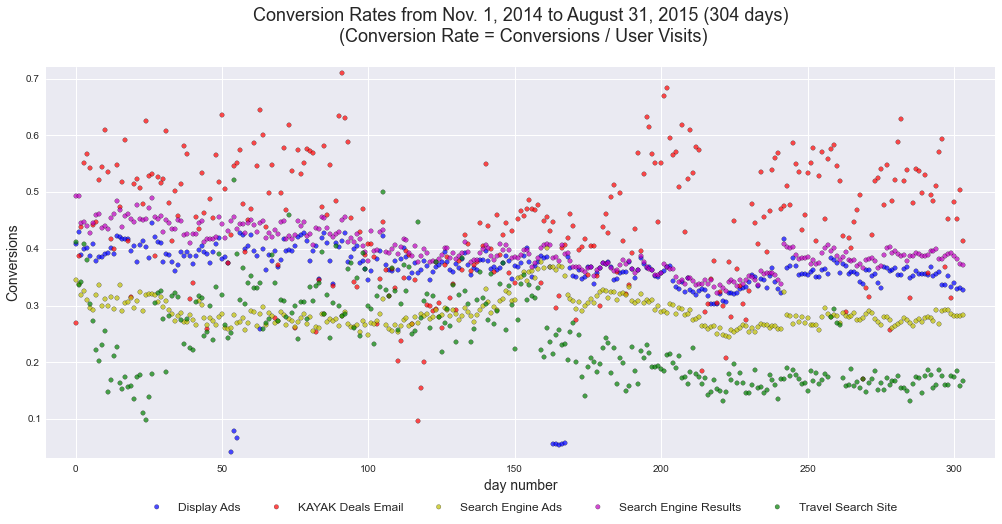

In [484]:
### 7a.

# show plots for Search Engine Results and Travel Search Site

day = conversion_data.shape[0]  # number of days in the dataset (304 days)
DA = conversion_data['Display Ads']
KDE = conversion_data['KAYAK Deals Email']
SEA = conversion_data['Search Engine Ads']
SER = conversion_data['Search Engine Results']
TSS = conversion_data['Travel Search Site']

print 'global_min_conversion_rate' , min(min(DA), min(KDE), min(SEA), min(SER), min(TSS))
print 'global_max_conversion_rate', max(max(DA), max(KDE), max(SEA), max(SER), max(TSS))
print 'global_max_conversion_rate without max(DA)', max(max(KDE), max(SEA), max(SER), max(TSS))

# this shows the value of the outlier datapoint found earlier: 2015-2-11 Display Ads
max(DA)

global_min_conversion_rate = min(min(DA), min(KDE), min(SEA), min(SER), min(TSS))
global_max_conversion_rate = max(max(KDE), max(SEA), max(SER), max(TSS))  # outlier datapoint in DA, don't show in plot

colors = ['b', 'r', 'y', 'm', 'g']
plt.figure(figsize=(17,7))

plt_DA = plt.scatter(conversion_data.index, DA, c=colors[0], alpha=0.7)
plt_KDE = plt.scatter(conversion_data.index, KDE, c=colors[1], alpha=0.7)
plt_SEA = plt.scatter(conversion_data.index, SEA, c=colors[2], alpha=0.7)
plt_SER = plt.scatter(conversion_data.index, SER, c=colors[3], alpha=0.7)
plt_TSS = plt.scatter(conversion_data.index, TSS, c=colors[4], alpha=0.7)

plt.axis([-10, day+10, global_min_conversion_rate-0.01, global_max_conversion_rate+0.01])

plt.legend((plt_DA, plt_KDE, plt_SEA, plt_SER, plt_TSS ),
           ('Display Ads', 'KAYAK Deals Email', 'Search Engine Ads', 'Search Engine Results', 'Travel Search Site'),
           scatterpoints=1, fontsize=12, bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5, borderaxespad=0.)

plt.title('Conversion Rates from Nov. 1, 2014 to August 31, 2015 (304 days) \n (Conversion Rate = Conversions / User Visits) \n', fontsize=18)
plt.xlabel('day number', fontsize=14)
plt.ylabel('Conversions', fontsize=14)
plt.grid(True)
plt.show()

<br/><a id='I7classifier'></a><b>Linear Regression Classifier</b>  |  <a href='#toc'>[Table of Contents]</a>

In [485]:
### 7a.

# build a linear regression classifier to train and test the data

clf = linear_model.LinearRegression()

# Split the data into training/testing sets
train = conversion_data_normalized.iloc[:-20]
test = conversion_data_normalized.iloc[-20:]

XX_train = train.values
XX_test = test.values

YY_train = conversions_bydate.conversions[:-20]
YY_test = conversions_bydate.conversions[-20:]

# fit model to training set (input: XX_train , output: YY_train)
# clf.coef_ stores the coefficients of the linear model trained on the training set
clf.fit(XX_train, YY_train)
clf.coef_

# predicted output from the model
predicted = clf.predict(XX_test)

print 'XX_test dimensions:', XX_test.shape, '\n'
print 'YY_test dimensions :', YY_test.shape, '\n'

print 'Coefficients: \n', clf.coef_ , '\n'

# MSE: mean squared error is mean of the squared value of (predicted output - actual output)
print 'Residual sum of squares: ', np.mean( (predicted - YY_test) **2 )

# explained variance score: 1 is perfect prediction
print 'Variance score: ', clf.score(XX_test, YY_test)


XX_test dimensions: (20L, 5L) 

YY_test dimensions : (20L,) 

Coefficients: 
[ 31763.21478221   -403.98763684  -2449.51728868  -7866.81896762
  -1689.00123713] 

Residual sum of squares:  97161944.2474
Variance score:  0.0352655493244


In [486]:
304-20

284

In [487]:
days_predicted = np.arange(conversion_data.shape[0]-20,conversion_data.shape[0])
days_predicted

array([284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
       297, 298, 299, 300, 301, 302, 303])

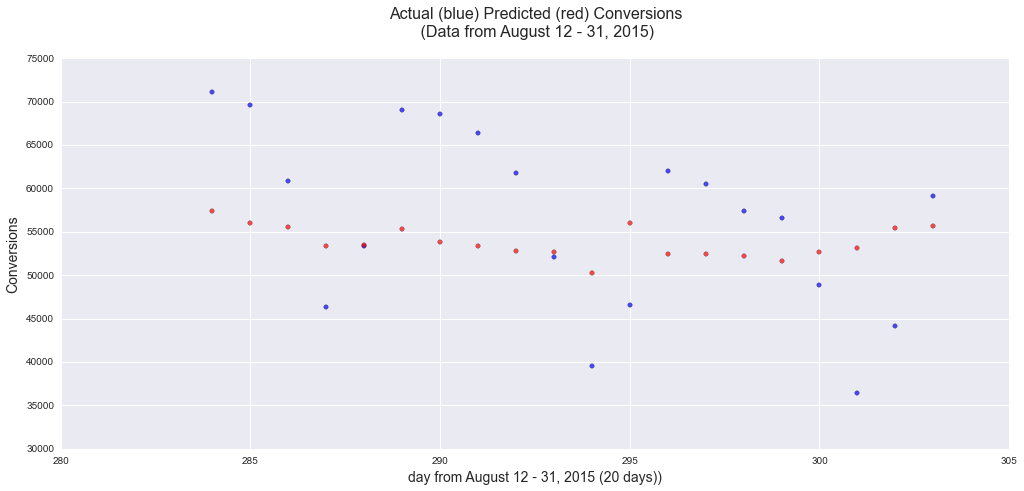

In [488]:
### 7a.

# plot actual vs. predicted outputs


plt.figure(figsize=(17,7))
plt.scatter(days_predicted, YY_test, c=colors[0], alpha=0.7)
plt.scatter(days_predicted, predicted, c=colors[1], alpha=0.7)

plt.xlabel('day from August 12 - 31, 2015 (20 days))', fontsize=14)
plt.ylabel('Conversions', fontsize=14)
plt.title('Actual (blue) Predicted (red) Conversions \n (Data from August 12 - 31, 2015) \n', fontsize=16)
plt.grid(True)
plt.show()

In [489]:
### 7a.

# print predicted conversion values next to actual conversion values
predicted
predicted_conversions = pd.DataFrame(np.around(predicted))

# from earlier
conversions_bydate_actual = conversions_bydate[-20:].reset_index(drop=True)

# stack predicted values next to actual values for corresponding dates
predicted_conversions = pd.concat([conversions_bydate_actual, predicted_conversions], ignore_index=True, axis=1)
predicted_conversions.rename(columns={0:'year', 1:'month', 2:'day', 3:'conversions', 4:'predicted_conversions'}, inplace=True)

print 'DataFrame predicted_conversions', predicted_conversions.shape
predicted_conversions

DataFrame predicted_conversions (20, 5)


,year,month,day,conversions,predicted_conversions
0,2015,8,12,71053,57415
1,2015,8,13,69636,55986
2,2015,8,14,60841,55508
3,2015,8,15,46325,53380
4,2015,8,16,53399,53432
5,2015,8,17,68978,55369
6,2015,8,18,68607,53881
7,2015,8,19,66369,53375
8,2015,8,20,61752,52813
9,2015,8,21,52115,52705


<br/><a id='I7improvedclassifier'></a><b>Improved Classifier</b>  |  <a href='#toc'>[Table of Contents]</a>

<a id='I7'></a><b>7a. ANSWER</b><br/>The values above are the predicted conversions for the last 20 days of the given dataset.
The classification model is a simple linear regression using the first 304 - 20 rows as training data and the last 20 rows as testing data.  The robustness of the prediction model can be increased by using logistic regression and cross-validation to find a training set that can best be generalized to an independent data set. <a href='#toc'>[Table of Contents]</a><br/><br/>